In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ruta_limpia = '../data/MX_videos_limpio.csv'
df = pd.read_csv(ruta_limpia)

features = ['views', 'likes', 'dislikes', 'comment_count']
X = df[features]

print("Dataset listo para clustering.")

Dataset listo para clustering.


In [2]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Datos escalados y listos para el modelo K-Means.")

Datos escalados y listos para el modelo K-Means.


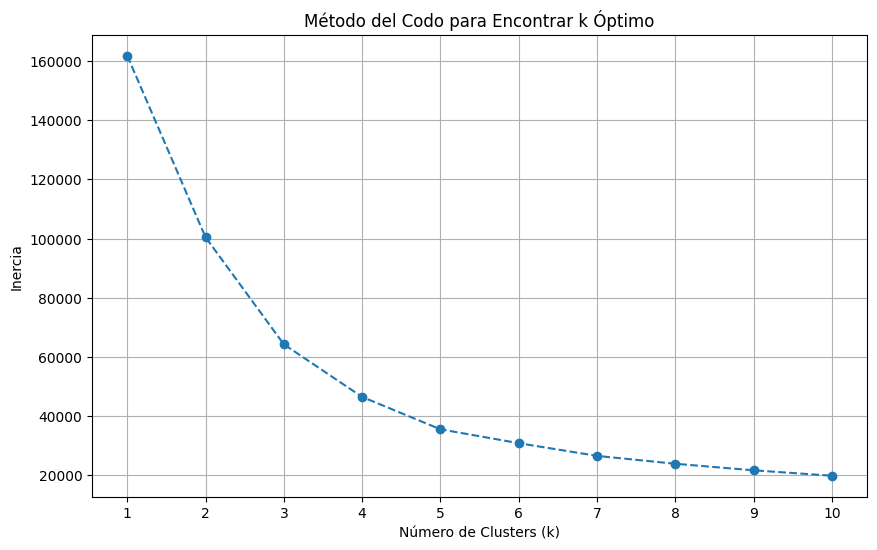

In [3]:
inertia = []
k_range = range(1, 11) 

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) 
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para Encontrar k Óptimo')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [4]:
k_optimo = 4

kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
kmeans.fit(X_scaled)

df['cluster'] = kmeans.labels_

print(f"Modelo K-Means entrenado con {k_optimo} clusters.")
print("Se ha añadido una columna 'cluster' al DataFrame.")

Modelo K-Means entrenado con 4 clusters.
Se ha añadido una columna 'cluster' al DataFrame.


In [5]:
cluster_analysis = df.groupby('cluster')[features].mean()
print("Análisis de las características promedio de cada cluster:")
print(cluster_analysis)

category_distribution = df.groupby('cluster')['category_name'].value_counts(normalize=True).unstack().fillna(0)
print("\nDistribución de categorías reales dentro de cada cluster (en %):")
print(category_distribution.head())

Análisis de las características promedio de cada cluster:
                views         likes      dislikes  comment_count
cluster                                                         
0        2.354333e+05  1.062805e+04  4.441011e+02    1374.808676
1        3.607107e+07  2.415510e+06  1.075854e+05  473426.142857
2        7.649786e+07  2.266806e+06  1.122160e+06  737823.000000
3        1.065773e+07  5.070769e+05  2.187578e+04   53768.542029

Distribución de categorías reales dentro de cada cluster (en %):
category_name  Autos & Vehicles  Categoría Desconocida    Comedy  Education  \
cluster                                                                       
0                      0.006286               0.006236  0.042655    0.01327   
1                      0.000000               0.142857  0.000000    0.00000   
2                      0.000000               0.000000  0.000000    0.00000   
3                      0.000000               0.000000  0.092754    0.00000   

category_na

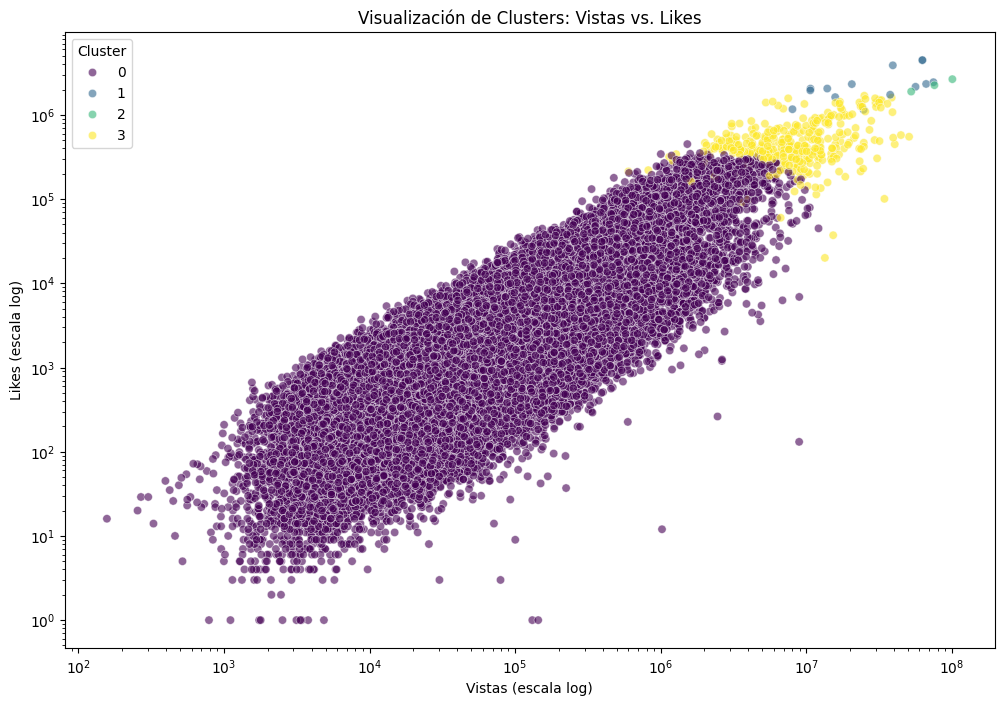

In [6]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='views', y='likes', hue='cluster', palette='viridis', alpha=0.6)
plt.title('Visualización de Clusters: Vistas vs. Likes')
plt.xlabel('Vistas (escala log)')
plt.ylabel('Likes (escala log)')
plt.xscale('log')
plt.yscale('log')
plt.legend(title='Cluster')
plt.show()